In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [28]:
df.replace("?", pd.NA, inplace=True)
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [29]:
df.dropna(inplace=True)
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [30]:
label_encoders= {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(label_encoders)

{'class': LabelEncoder(), 'cap-shape': LabelEncoder(), 'cap-surface': LabelEncoder(), 'cap-color': LabelEncoder(), 'bruises': LabelEncoder(), 'odor': LabelEncoder(), 'gill-attachment': LabelEncoder(), 'gill-spacing': LabelEncoder(), 'gill-size': LabelEncoder(), 'gill-color': LabelEncoder(), 'stalk-shape': LabelEncoder(), 'stalk-root': LabelEncoder(), 'stalk-surface-above-ring': LabelEncoder(), 'stalk-surface-below-ring': LabelEncoder(), 'stalk-color-above-ring': LabelEncoder(), 'stalk-color-below-ring': LabelEncoder(), 'veil-type': LabelEncoder(), 'veil-color': LabelEncoder(), 'ring-number': LabelEncoder(), 'ring-type': LabelEncoder(), 'spore-print-color': LabelEncoder(), 'population': LabelEncoder(), 'habitat': LabelEncoder()}


In [31]:
print("Dataset hajmi:", df.shape)
df.head()

Dataset hajmi: (5644, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1


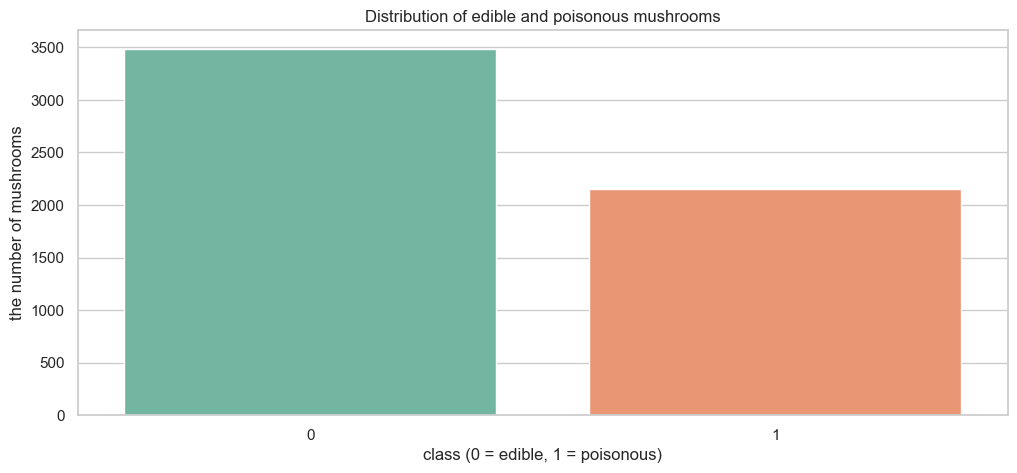

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

sns.countplot(x='class', data=df, palette='Set2')
plt.title("Distribution of edible and poisonous mushrooms")
plt.xlabel("class (0 = edible, 1 = poisonous)")
plt.ylabel("the number of mushrooms")
plt.show()


In [33]:
scaler = StandardScaler()
x = scaler.fit_transform(df.drop("class", axis=1))
y = df["class"]

In [34]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)

In [36]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

Decision Tree Accuracy: 1.0


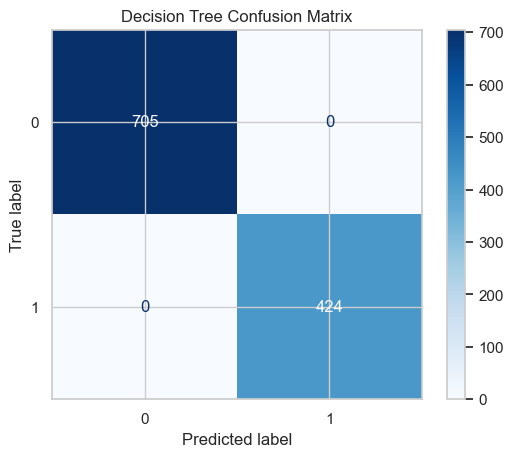

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       424

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, x_test, y_test, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))


In [39]:
os.makedirs("models", exist_ok=True)

In [40]:
with open("models/LabelEncoder.pkl", 'wb') as f:
    pickle.dump(label_encoders, f)

with open("models/StandartScaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)

with open("models/DecisionTree.pkl", 'wb') as f:
    pickle.dump(dt_model, f)
